<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

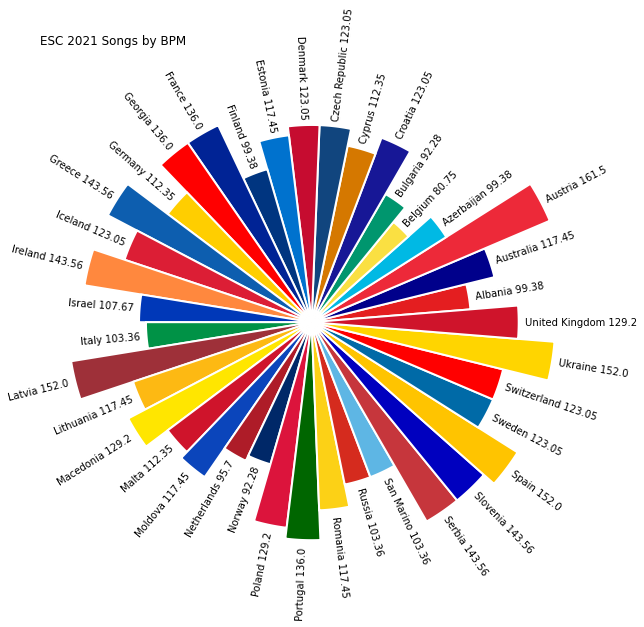

In [13]:
# importing matplotlib (graph), numpy (data manipulation)
import matplotlib.pyplot as pt
import numpy as np

# reading in data
vd = pd.read_csv("BPMData.csv", encoding="latin1")

# creating figure and axes
pt.figure(figsize=(20,10))
ax = pt.subplot(111, polar=True)
pt.axis('off')
upperLimit = 200
lowerLimit = 0
max = vd['BPM'].max()

# obtaining slope, height, and width to make proportional circle graph
slope = (max - lowerLimit) / max
heights = slope * vd.BPM + lowerLimit
width = 2*np.pi / len(vd.index)

# obtaining angles for each data point
indexes = list(range(1, len(vd.index)+1))
angles = [element * width for element in indexes]
angles

# plotting the bars
bars = ax.bar(
        x=angles,
        height=heights,
        width=width,
        bottom=lowerLimit,
        linewidth=2,
        edgecolor="white",
        color=vd['Color'])

# plotting labels
for bar, angle, height, label, bpm in zip(bars,angles, heights, vd["ï»¿Country"], vd["BPM"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + 4, 
        s=label + " " + str(round(bpm,2)),
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
# titling
pt.title("ESC 2021 Songs by BPM", loc="left")

# show the graph
pt

In [14]:
# importing pandas (data reading), os (file reading), folium (choropleth)
import pandas as pd
import os
import folium

# Opening geojson file and bpm data
state_geo = os.path.join('data/eurovision.geojson')
bpm_data = f"BPMData.csv"
country_data = pd.read_csv(bpm_data)

# setting initial map state
map = folium.Map(location=[50, 0], zoom_start=2)

# inputting data into map
folium.Choropleth(geo_data=state_geo,
    data=country_data,
    columns=["Country", "BPM"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="beats per minute (bpm)",
).add_to(map)

# show the graph
map

In [15]:
# importing plotly(graph), pandas (data manipulation)
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as op

# Creating a dataframe
pd.set_option("max.columns", 30)
print("")
vd = pd.read_csv("2021JuryVote.csv", encoding="latin1")
vd = vd[["From","FromLan", "FromLon", "To", "ToLan", "ToLon", "Points"]]

# creating dictionary of relevant ata
source_to_dest = zip(vd["FromLan"], vd["FromLon"], vd["ToLan"], vd["ToLon"], vd["Points"], vd["From"], vd["To"])
source_markers = zip(vd["To"], vd["ToLan"], vd["ToLon"])

# creating figure
fig = go.Figure()

# plotting points and arcs
for FromLan, FromLon, ToLan, ToLon, Points, From, To in source_to_dest:
    fig.add_trace(go.Scattergeo(
                        lat = [FromLan,ToLan],
                        lon = [FromLon, ToLon],
                        mode = 'lines',
                        line = dict(width = 1, color="red"),
                        name = str(Points) + " pts",
                        text = str(From) + " to " + str(To),
                        ))
# plotting markers
for To, ToLan, ToLon in source_markers:
    fig.add_trace(go.Scattergeo(
                    lat = [ToLan],
                    lon = [ToLon],
                    mode = 'markers',
                    marker = dict(symbol="star-dot", size=12, sizemode="diameter"),
                    text = str(To)
                    ))

# overlaying on world map
fig.update_layout(title_text = 'Connection Map of 12 Points awarded by all Juries',
                  height=700, width=900,
                  margin={"t":0,"b":0,"l":0, "r":0, "pad":0},
                  geo = dict(projection_type ='natural earth',scope = 'world', showcountries=True),
                  showlegend=False)
# Show the graph
fig

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

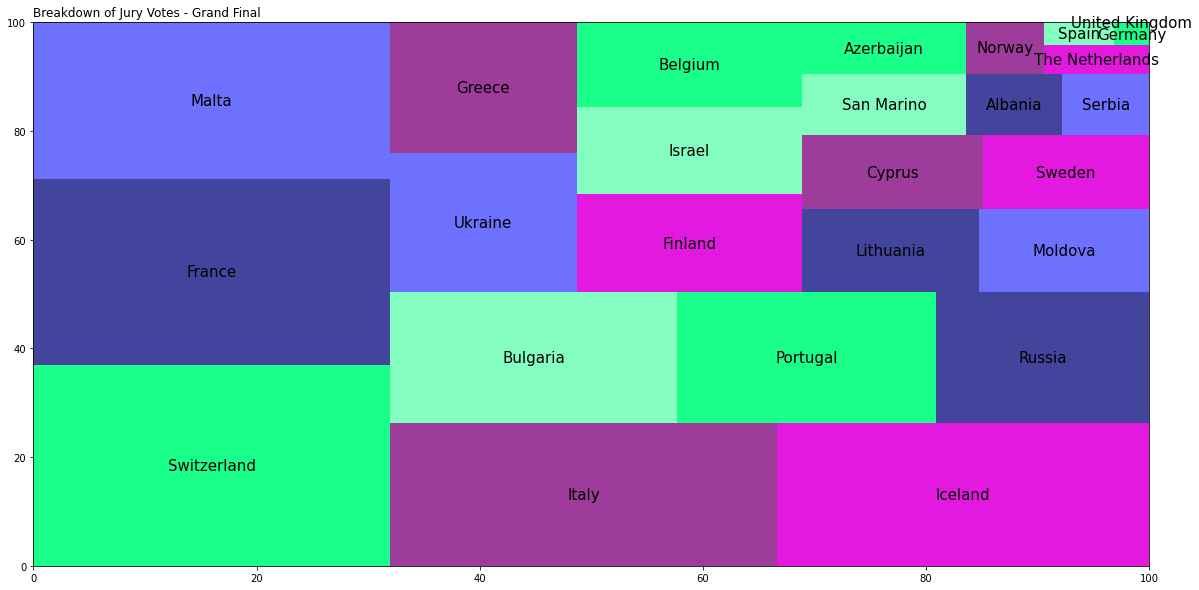

In [5]:
# importing matplotlib and plotly(graph), pandas (data manipulation), squarify (treemap)
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# creating figure and initializing colors to be used
plt.figure(figsize=(20,10))
colors=['#00ff7d','#2e3192','#5d62fe','#92278f', '#e200dd', "#77feb9"]

# creating a dataframe
vd = pd.read_csv("2021FinalPoints.csv", nrows = 50000, encoding="latin1")
vd = vd[["Type", "Country", "Points"]]

# selecting only relevant data
jd = vd[(vd["Type"] == "Jury")]

# plotting on figure
fig = px.treemap(jd, 
                 path=['Country', 'Points'], 
                 values='Points',
                 color='Points'
                )
squarify.plot(sizes=jd["Points"], label=jd['Country'], color=colors, alpha=0.9, text_kwargs={'fontsize':15, 'color':'Black'})

# creating title and axes
plt.axis('on')
plt.title("Breakdown of Jury Votes - Grand Final", loc="left")
#libraries
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

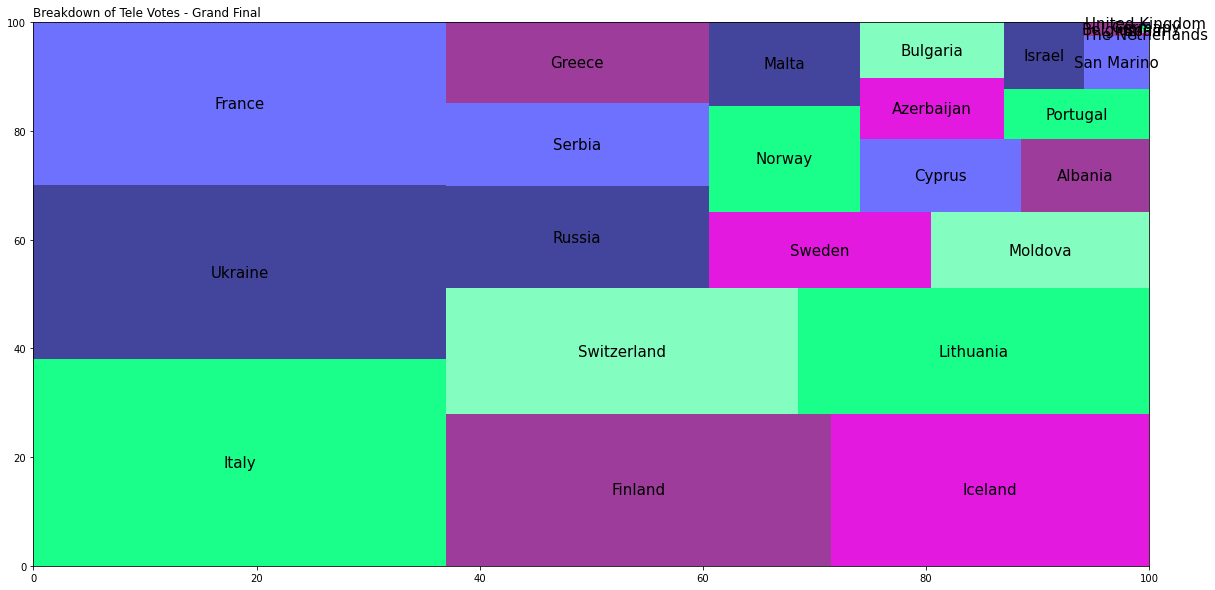

In [6]:
# importing matplotlib and plotly(graph), pandas (data manipulation), squarify (treemap)
import plotly.express as px
import pandas as pd
import squarify

# creating figure and initializing colors to be used
plt.figure(figsize=(20,10))
colors=['#00ff7d','#2e3192','#5d62fe','#92278f', '#e200dd', "#77feb9"]

# creating a dataframe
vd = pd.read_csv("2021FinalPoints.csv", nrows = 50000, encoding="latin1")
vd = vd[["Type", "Country", "Points"]]

# selecting only relevant data
td = vd[(vd["Type"] == "Tele")]

# plotting on figure
fig = px.treemap(td, 
                 path=['Country', 'Points'], 
                 values='Points',
                 color='Points'
                )
squarify.plot(sizes=td["Points"], label=td['Country'], color=colors, alpha=0.9, text_kwargs={'fontsize':15, 'color':'black'})

# creating title and axes
plt.axis('on')
plt.title("Breakdown of Tele Votes - Grand Final", loc="left")

#show the graph
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

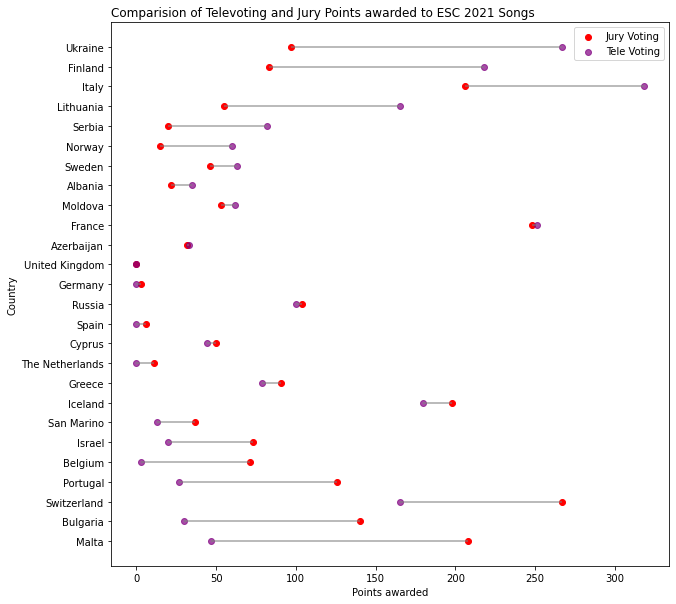

In [16]:
# importing matplotlib (graph), pandas (data manipulation)
import pandas as pd
import matplotlib.pyplot as plt
 
# Creating dataframe
vd = pd.read_csv("2021AllPoints.csv")
vd = vd[["Show", "Country", "Jury", "Tele", "Difference"]]

jd=vd["Jury"]
td=vd["Tele"]

# ordering data and obtaining range
ordered_jd = vd.sort_values(by='Difference')
my_range=range(1,len(jd.index)+1)

ordered_td = vd.sort_values(by='Difference')
my_range=range(1,len(td.index)+1)

# creating figure
plt.figure(figsize=(10,10))

# plotting points
plt.hlines(y=my_range, xmin=ordered_jd['Jury'], xmax=ordered_td['Tele'], color='grey', alpha=0.7)
plt.scatter(ordered_jd['Jury'], my_range, color='red', alpha=1, label='Jury Voting')
plt.scatter(ordered_td['Tele'], my_range, color='purple', alpha=0.7 , label='Tele Voting')
plt.legend()

# adding title and axes
plt.yticks(my_range, ordered_td['Country'])
plt.title("Comparision of Televoting and Jury Points awarded to ESC 2021 Songs", loc="left")
plt.xlabel('Points awarded')
plt.ylabel('Country')

# Show the graph
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

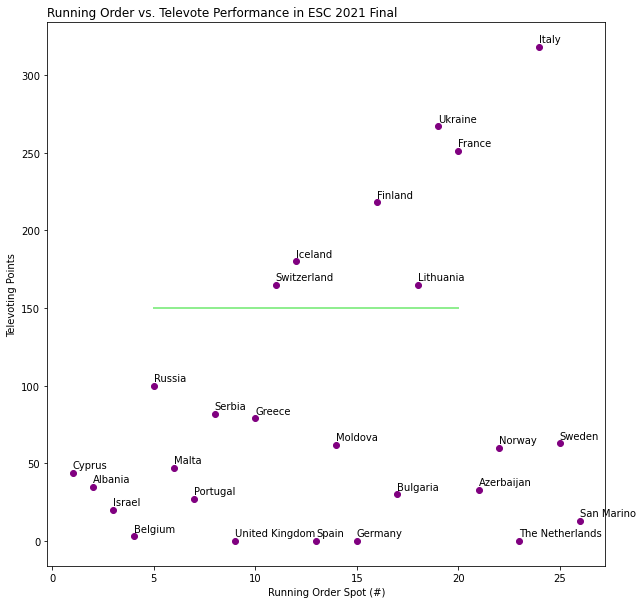

In [17]:
# importing matplotlib (graph), pandas (data manipulation)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
 
# Create a dataset:
plt.figure(figsize=(10,10))
vd = pd.read_csv("2021AllPoints.csv")
vd = vd[["Country", "Tele", "Difference", "Order"]]
numOfCountries = len(vd["Country"])

# plot
plt.plot( 'Order', 'Tele', data=vd, linestyle='none', marker='o', color="purple", label="country")
plt.xlabel("Running Order Spot (#)")
plt.ylabel("Televoting Points")

# adding line of demarcation
plt.plot([5, 20], [150, 150], color="lightgreen", lw=2, linestyle='solid')

# title
plt.title("Running Order vs. Televote Performance in ESC 2021 Final", loc="left")

# adding label to country-points
for i in range(numOfCountries):
    plt.annotate(vd["Country"][i], xy=(vd["Order"][i], vd["Tele"][i]), xytext=(vd["Order"][i], vd["Tele"][i]+3))

# Show the graph
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

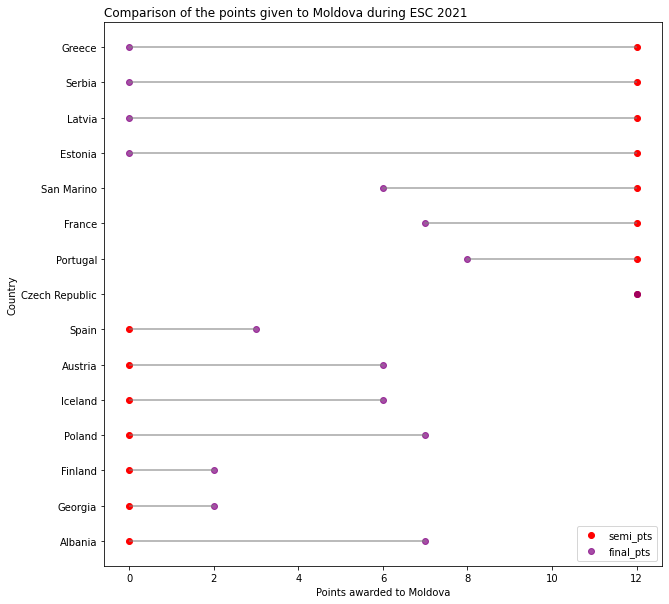

In [12]:
# importing matplotlib (graph), pandas (data manipulation)
import pandas as pd
import matplotlib.pyplot as plt
 
# Creating a dataframe
vd = pd.read_csv("MoldovaVotes.csv")
plt.figure(figsize=(10,10))
 
# Reordering it following the values of the first value:
ordered_vd = vd.sort_values(by='semi_pts')
my_range=range(1,len(vd.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_vd['semi_pts'], xmax=ordered_vd['final_pts'], color='grey', alpha=0.7)
plt.scatter(ordered_vd['semi_pts'], my_range, color='red', alpha=1, label='semi_pts')
plt.scatter(ordered_vd['final_pts'], my_range, color='purple', alpha=0.7 , label='final_pts')
plt.legend()
 
# Adding title and axis names
plt.yticks(my_range, ordered_vd['country'])
plt.title("Comparison of the points given to Moldova during ESC 2021", loc="left")
plt.xlabel('Points awarded to Moldova')
plt.ylabel('Country')

# Show the graph
plt